# **Notebook resources**

In [76]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [77]:
!pip install geopandas
!pip install category_encoders
!pip install catboost
!pip install xgboost
!pip install shap
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import hdbscan

In [79]:
# SET CUSTOM MODULES FOLDER
import sys
sys.path.append('/content/drive/MyDrive/Kschool_TFM/src/modules/')

# CUSTOM MODULES
import model_funcs as mf
import viz_funcs as vf
import other_funcs as of

In [80]:
datasets_folder = '/content/drive/MyDrive/Kschool_TFM/datasets'

In [81]:
df_clean = pd.read_csv(f'{datasets_folder}{os.sep}dataset-04-fe_clean.csv')
df_target_encoding = pd.read_csv(f'{datasets_folder}{os.sep}dataset-04-fe_target_encoding.csv')
df_one_hot_encoding = pd.read_csv(f'{datasets_folder}{os.sep}dataset-04-fe_one_hot_encoding.csv')
df_one_hot_encoding_less = pd.read_csv(f'{datasets_folder}{os.sep}dataset-04-fe_one_hot_encoding_less.csv')

# **Modeling**

## **Regression Models Benchmarking**

### **Overview**

At this point, what we do is to confront the different encodings made in the previous notebook through 8 different models in order to compare the scores, mainly by looking at R2 and RMSE, since the latter seems to be quite high.

#### **With One Hot Encoding (winner)**

In [82]:
models_OHE = mf.test_regression_models(df_one_hot_encoding,'all')

TOTAL - MODEL BENCHMARKING



model      r2           mse         rmse  \
0              Linear Regression  0.8040  1.285399e+10  113375.4502   
1              Linear Regression  0.7990  1.301214e+10  114070.7645   
2       Decision Tree Regression  0.9906  6.134833e+08   24768.5952   
3       Decision Tree Regression  0.7712  1.480877e+10  121691.2930   
4       Random Forest Regression  0.9741  1.701242e+09   41246.1103   
5       Random Forest Regression  0.8599  9.068787e+09   95230.1768   
6            AdaBoost Regression  0.9835  1.079675e+09   32858.4121   
7            AdaBoost Regression  0.8475  9.868961e+09   99342.6427   
8   Gradient Boosting Regression  0.8666  8.747883e+09   93530.1196   
9   Gradient Boosting Regression  0.8521  9.572575e+09   97839.5388   
10            XGBoost Regression  0.8668  8.736963e+09   93471.7218   
11            XGBoost Regression  0.8522  9.566165e+09   97806.7761   
12           CatBoost Regression  0.9084  6.005724e+09   77496.6049   
13           CatBoost Regression  0.8707  8.369643e+09   91485.7534   
14            LightBM Regression  0.8938  6.964769e+09   83455.1889   
15            LightBM Regression  0.8668  8.623379e+09   92862.1523   

           mae   type  
0   79431.0904  train  
1   79826.6809   test  
2    7960.7488  train  
3   75020.7974   test  
4   25949.1105  train  
5   61077.8567   test  
6   15939.6684  train  
7   62068.0568   test  
8   61880.4906  train  
9   64979.2453   test  
10  61869.5751  train  
11  64936.7896   test  
12  51549.8699  train  
13  59980.8480   test  
14  55341.9985  train  
15  61213.5767   test


TRAIN - MODEL BENCHMARKING



model      r2           mse         rmse  \
0      Decision Tree Regression  0.9906  6.134833e+08   24768.5952   
1           AdaBoost Regression  0.9835  1.079675e+09   32858.4121   
2      Random Forest Regression  0.9741  1.701242e+09   41246.1103   
3           CatBoost Regression  0.9084  6.005724e+09   77496.6049   
4            LightBM Regression  0.8938  6.964769e+09   83455.1889   
5            XGBoost Regression  0.8668  8.736963e+09   93471.7218   
6  Gradient Boosting Regression  0.8666  8.747883e+09   93530.1196   
7             Linear Regression  0.8040  1.285399e+10  113375.4502   

          mae   type  
0   7960.7488  train  
1  15939.6684  train  
2  25949.1105  train  
3  51549.8699  train  
4  55341.9985  train  
5  61869.5751  train  
6  61880.4906  train  
7  79431.0904  train


TEST - MODEL BENCHMARKING



model      r2           mse         rmse  \
0           CatBoost Regression  0.8707  8.369643e+09   91485.7534   
1            LightBM Regression  0.8668  8.623379e+09   92862.1523   
2      Random Forest Regression  0.8599  9.068787e+09   95230.1768   
3            XGBoost Regression  0.8522  9.566165e+09   97806.7761   
4  Gradient Boosting Regression  0.8521  9.572575e+09   97839.5388   
5           AdaBoost Regression  0.8475  9.868961e+09   99342.6427   
6             Linear Regression  0.7990  1.301214e+10  114070.7645   
7      Decision Tree Regression  0.7712  1.480877e+10  121691.2930   

          mae  type  
0  59980.8480  test  
1  61213.5767  test  
2  61077.8567  test  
3  64936.7896  test  
4  64979.2453  test  
5  62068.0568  test  
6  79826.6809  test  
7  75020.7974  test

#### **With Target Encoding**

In [83]:
models_TE = mf.test_regression_models(df_target_encoding,'all')

TOTAL - MODEL BENCHMARKING



model      r2           mse         rmse  \
0              Linear Regression  0.7786  1.452245e+10  120509.1448   
1              Linear Regression  0.7766  1.445927e+10  120246.7201   
2       Decision Tree Regression  0.9906  6.134833e+08   24768.5952   
3       Decision Tree Regression  0.7693  1.493310e+10  122201.0651   
4       Random Forest Regression  0.9741  1.700845e+09   41241.3030   
5       Random Forest Regression  0.8577  9.207797e+09   95957.2666   
6            AdaBoost Regression  0.9832  1.098948e+09   33150.3784   
7            AdaBoost Regression  0.8438  1.010894e+10  100543.2393   
8   Gradient Boosting Regression  0.8612  9.100413e+09   95396.0856   
9   Gradient Boosting Regression  0.8488  9.785742e+09   98922.9094   
10            XGBoost Regression  0.8613  9.094666e+09   95365.9571   
11            XGBoost Regression  0.8487  9.790818e+09   98948.5633   
12           CatBoost Regression  0.9055  6.199335e+09   78735.8579   
13           CatBoost Regression  0.8681  8.539317e+09   92408.4234   
14            LightBM Regression  0.8930  7.014969e+09   83755.4097   
15            LightBM Regression  0.8657  8.692283e+09   93232.4134   

           mae   type  
0   85386.8406  train  
1   85216.2845   test  
2    7960.7488  train  
3   74915.7179   test  
4   26121.0647  train  
5   61312.1399   test  
6   16218.1902  train  
7   62582.9342   test  
8   63661.2011  train  
9   65901.3380   test  
10  63549.0147  train  
11  65875.6699   test  
12  52370.4355  train  
13  60653.9098   test  
14  55772.4361  train  
15  61452.7646   test


TRAIN - MODEL BENCHMARKING



model      r2           mse         rmse  \
0      Decision Tree Regression  0.9906  6.134833e+08   24768.5952   
1           AdaBoost Regression  0.9832  1.098948e+09   33150.3784   
2      Random Forest Regression  0.9741  1.700845e+09   41241.3030   
3           CatBoost Regression  0.9055  6.199335e+09   78735.8579   
4            LightBM Regression  0.8930  7.014969e+09   83755.4097   
5            XGBoost Regression  0.8613  9.094666e+09   95365.9571   
6  Gradient Boosting Regression  0.8612  9.100413e+09   95396.0856   
7             Linear Regression  0.7786  1.452245e+10  120509.1448   

          mae   type  
0   7960.7488  train  
1  16218.1902  train  
2  26121.0647  train  
3  52370.4355  train  
4  55772.4361  train  
5  63549.0147  train  
6  63661.2011  train  
7  85386.8406  train


TEST - MODEL BENCHMARKING



model      r2           mse         rmse  \
0           CatBoost Regression  0.8681  8.539317e+09   92408.4234   
1            LightBM Regression  0.8657  8.692283e+09   93232.4134   
2      Random Forest Regression  0.8577  9.207797e+09   95957.2666   
3  Gradient Boosting Regression  0.8488  9.785742e+09   98922.9094   
4            XGBoost Regression  0.8487  9.790818e+09   98948.5633   
5           AdaBoost Regression  0.8438  1.010894e+10  100543.2393   
6             Linear Regression  0.7766  1.445927e+10  120246.7201   
7      Decision Tree Regression  0.7693  1.493310e+10  122201.0651   

          mae  type  
0  60653.9098  test  
1  61452.7646  test  
2  61312.1399  test  
3  65901.3380  test  
4  65875.6699  test  
5  62582.9342  test  
6  85216.2845  test  
7  74915.7179  test

#### With One Hot Encoding (hasLift+propertyType)

In [84]:
models_OHEL = mf.test_regression_models(df_one_hot_encoding_less,'all')

TOTAL - MODEL BENCHMARKING



model      r2           mse         rmse  \
0              Linear Regression  0.8049  1.279845e+10  113130.2200   
1              Linear Regression  0.7990  1.300747e+10  114050.3019   
2       Decision Tree Regression  0.9906  6.134833e+08   24768.5952   
3       Decision Tree Regression  0.7654  1.518658e+10  123233.8239   
4       Random Forest Regression  0.9743  1.683159e+09   41026.3190   
5       Random Forest Regression  0.8610  8.996177e+09   94848.1766   
6            AdaBoost Regression  0.9829  1.122914e+09   33509.9135   
7            AdaBoost Regression  0.8432  1.015101e+10  100752.2005   
8   Gradient Boosting Regression  0.8666  8.747625e+09   93528.7402   
9   Gradient Boosting Regression  0.8517  9.599603e+09   97977.5650   
10            XGBoost Regression  0.8661  8.781270e+09   93708.4301   
11            XGBoost Regression  0.8520  9.577574e+09   97865.0792   
12           CatBoost Regression  0.9080  6.031923e+09   77665.4588   
13           CatBoost Regression  0.8694  8.450017e+09   91923.9748   
14            LightBM Regression  0.8941  6.945412e+09   83339.1411   
15            LightBM Regression  0.8667  8.625238e+09   92872.1588   

           mae   type  
0   79227.6378  train  
1   79708.8795   test  
2    7960.7488  train  
3   75234.2351   test  
4   25922.7722  train  
5   60929.0619   test  
6   16459.0297  train  
7   62823.8748   test  
8   61964.8512  train  
9   65056.4929   test  
10  62106.3801  train  
11  65007.3203   test  
12  51745.3390  train  
13  60313.9286   test  
14  55229.6086  train  
15  61092.6557   test


TRAIN - MODEL BENCHMARKING



model      r2           mse         rmse  \
0      Decision Tree Regression  0.9906  6.134833e+08   24768.5952   
1           AdaBoost Regression  0.9829  1.122914e+09   33509.9135   
2      Random Forest Regression  0.9743  1.683159e+09   41026.3190   
3           CatBoost Regression  0.9080  6.031923e+09   77665.4588   
4            LightBM Regression  0.8941  6.945412e+09   83339.1411   
5  Gradient Boosting Regression  0.8666  8.747625e+09   93528.7402   
6            XGBoost Regression  0.8661  8.781270e+09   93708.4301   
7             Linear Regression  0.8049  1.279845e+10  113130.2200   

          mae   type  
0   7960.7488  train  
1  16459.0297  train  
2  25922.7722  train  
3  51745.3390  train  
4  55229.6086  train  
5  61964.8512  train  
6  62106.3801  train  
7  79227.6378  train


TEST - MODEL BENCHMARKING



model      r2           mse         rmse  \
0           CatBoost Regression  0.8694  8.450017e+09   91923.9748   
1            LightBM Regression  0.8667  8.625238e+09   92872.1588   
2      Random Forest Regression  0.8610  8.996177e+09   94848.1766   
3            XGBoost Regression  0.8520  9.577574e+09   97865.0792   
4  Gradient Boosting Regression  0.8517  9.599603e+09   97977.5650   
5           AdaBoost Regression  0.8432  1.015101e+10  100752.2005   
6             Linear Regression  0.7990  1.300747e+10  114050.3019   
7      Decision Tree Regression  0.7654  1.518658e+10  123233.8239   

          mae  type  
0  60313.9286  test  
1  61092.6557  test  
2  60929.0619  test  
3  65007.3203  test  
4  65056.4929  test  
5  62823.8748  test  
6  79708.8795  test  
7  75234.2351  test

### **One by one regression models**

Having seen that the One Hot Encoding seems to be the best performer in the test predictions, we decided to continue with this one and look at each model one by one.

In [85]:
df_model = df_one_hot_encoding

#### **Linear Regression**

Linear Regression



model     r2           mse         rmse         mae   type
0  Linear Regression  0.804  1.285399e+10  113375.4502  79431.0904  train
1  Linear Regression  0.799  1.301214e+10  114070.7645  79826.6809   test

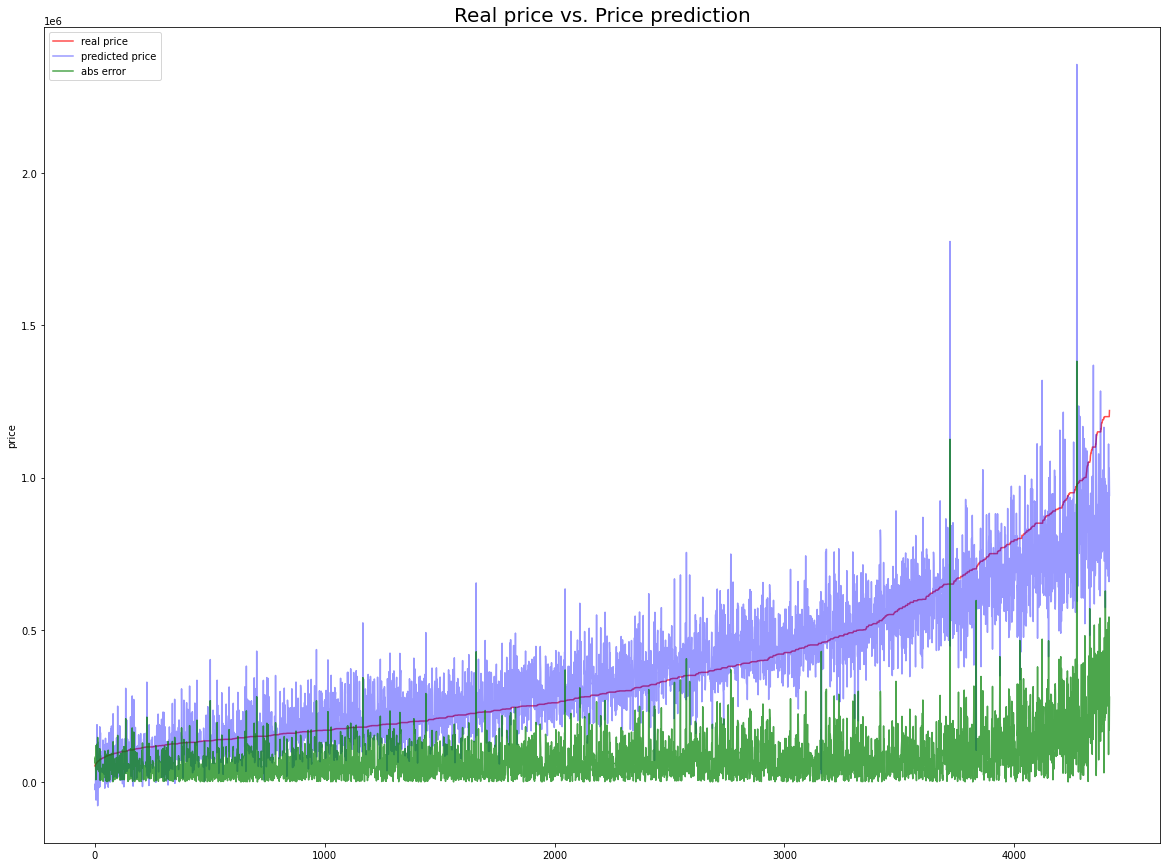

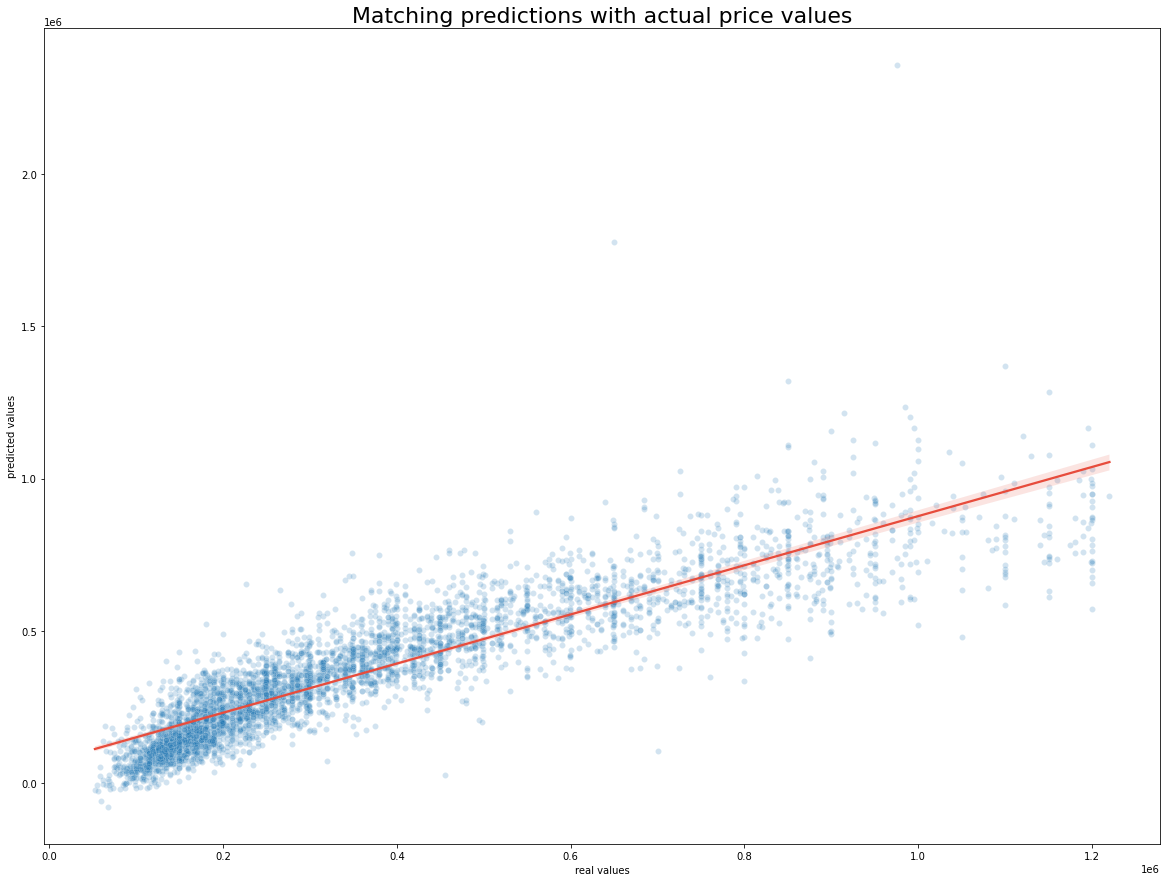

In [86]:
models = mf.test_regression_models(df_model,'Linear Regression')

#### **Decision Tree Regression**

Decision Tree Regression



model      r2           mse         rmse         mae  \
0  Decision Tree Regression  0.9906  6.134833e+08   24768.5952   7960.7488   
1  Decision Tree Regression  0.7694  1.492574e+10  122170.9638  75155.7484   

    type  
0  train  
1   test

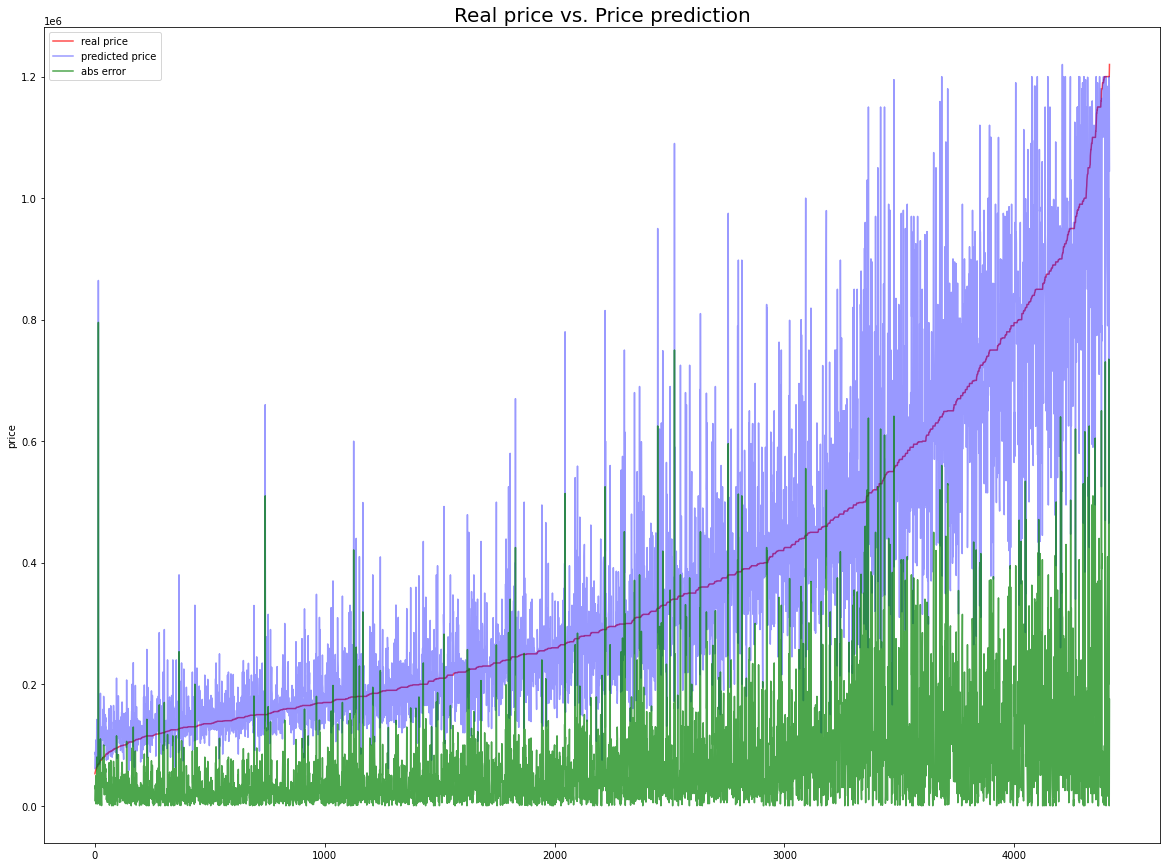

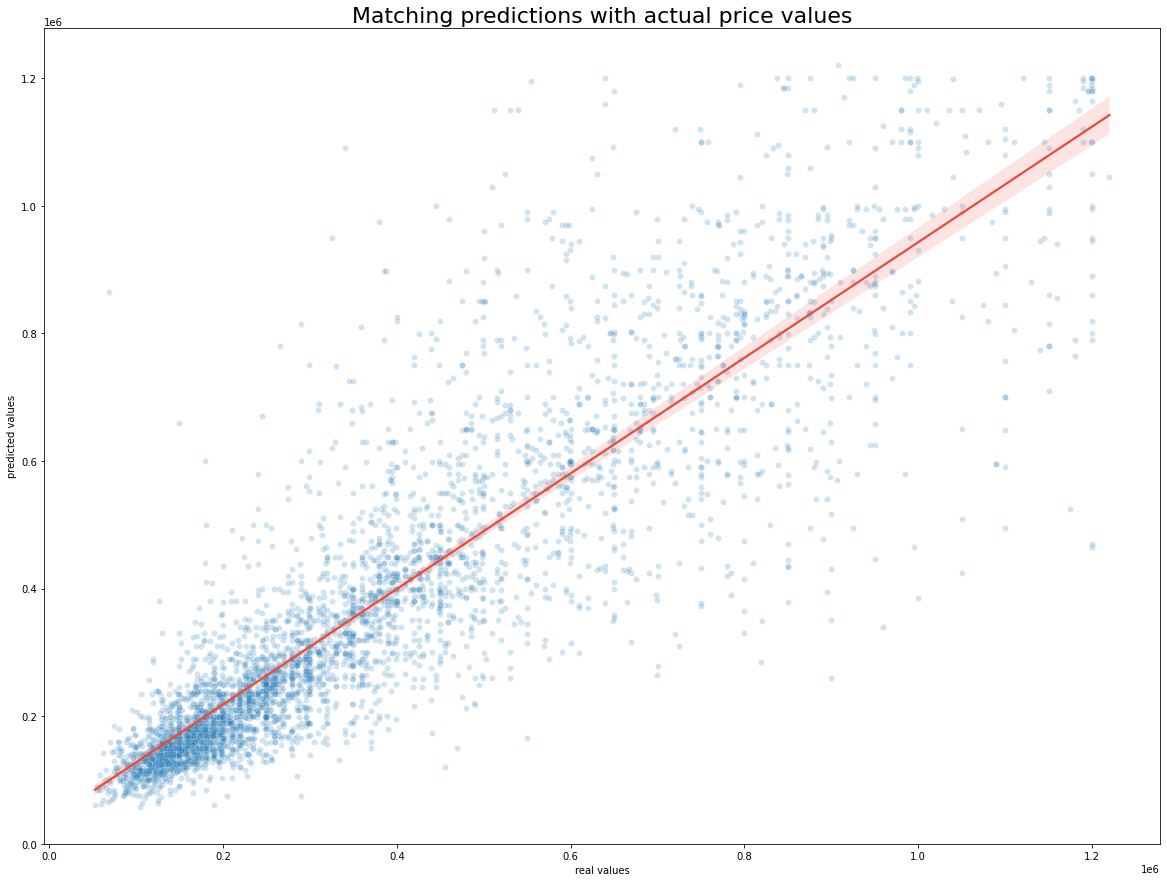

In [87]:
models = mf.test_regression_models(df_model,'Decision Tree Regression')

#### **Random Forest Regressor**

Random Forest Regression



model      r2           mse        rmse         mae  \
0  Random Forest Regression  0.9744  1.679598e+09  40982.9009  25800.2408   
1  Random Forest Regression  0.8608  9.010072e+09  94921.3971  61010.7386   

    type  
0  train  
1   test

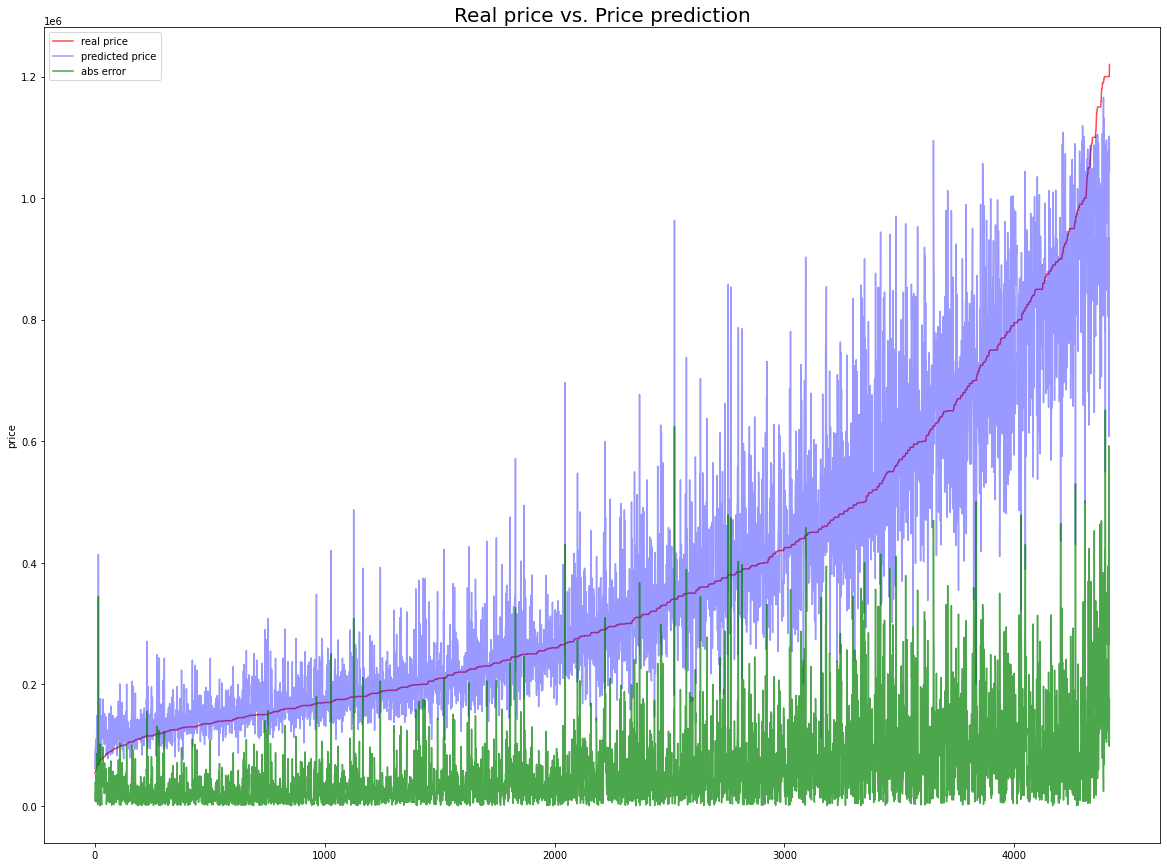

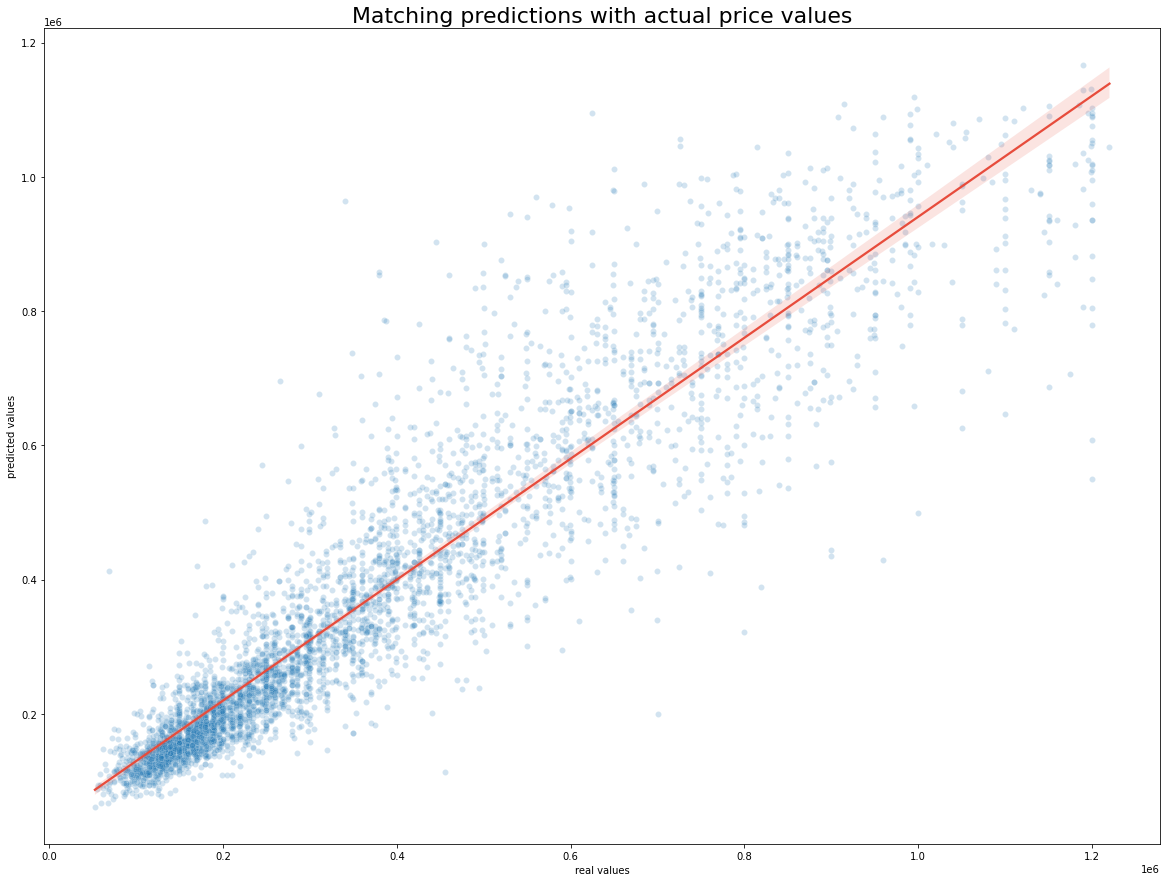

In [88]:
models = mf.test_regression_models(df_model,'Random Forest Regression')

#### **AdaBoost Regressor**

AdaBoost Regression



model      r2           mse        rmse         mae   type
0  AdaBoost Regression  0.9827  1.135637e+09  33699.2198  16672.5041  train
1  AdaBoost Regression  0.8483  9.817650e+09  99084.0575  62178.0352   test

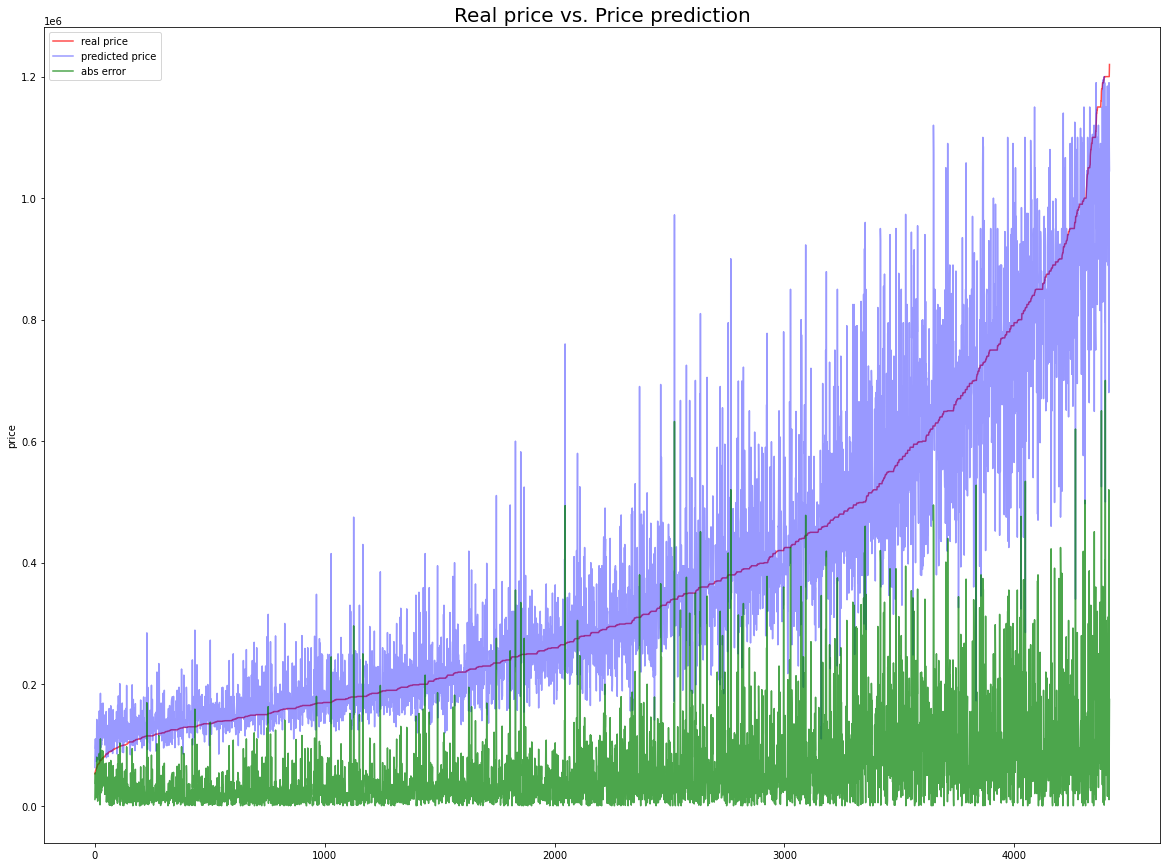

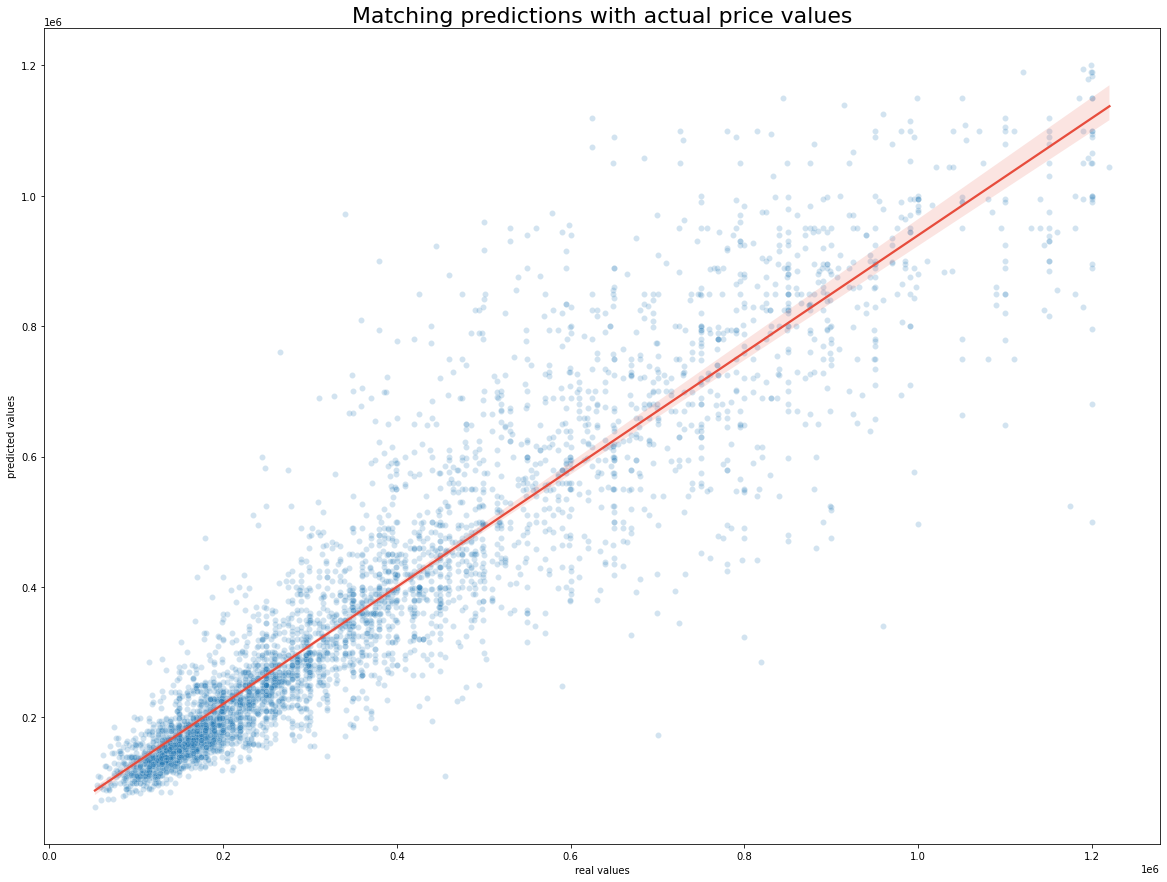

In [89]:
models = mf.test_regression_models(df_model,'AdaBoost Regression')

#### **Gradient Boosting Regressor**

Gradient Boosting Regression



model      r2           mse        rmse         mae  \
0  Gradient Boosting Regression  0.8666  8.747883e+09  93530.1196  61880.4906   
1  Gradient Boosting Regression  0.8521  9.572575e+09  97839.5388  64979.2453   

    type  
0  train  
1   test

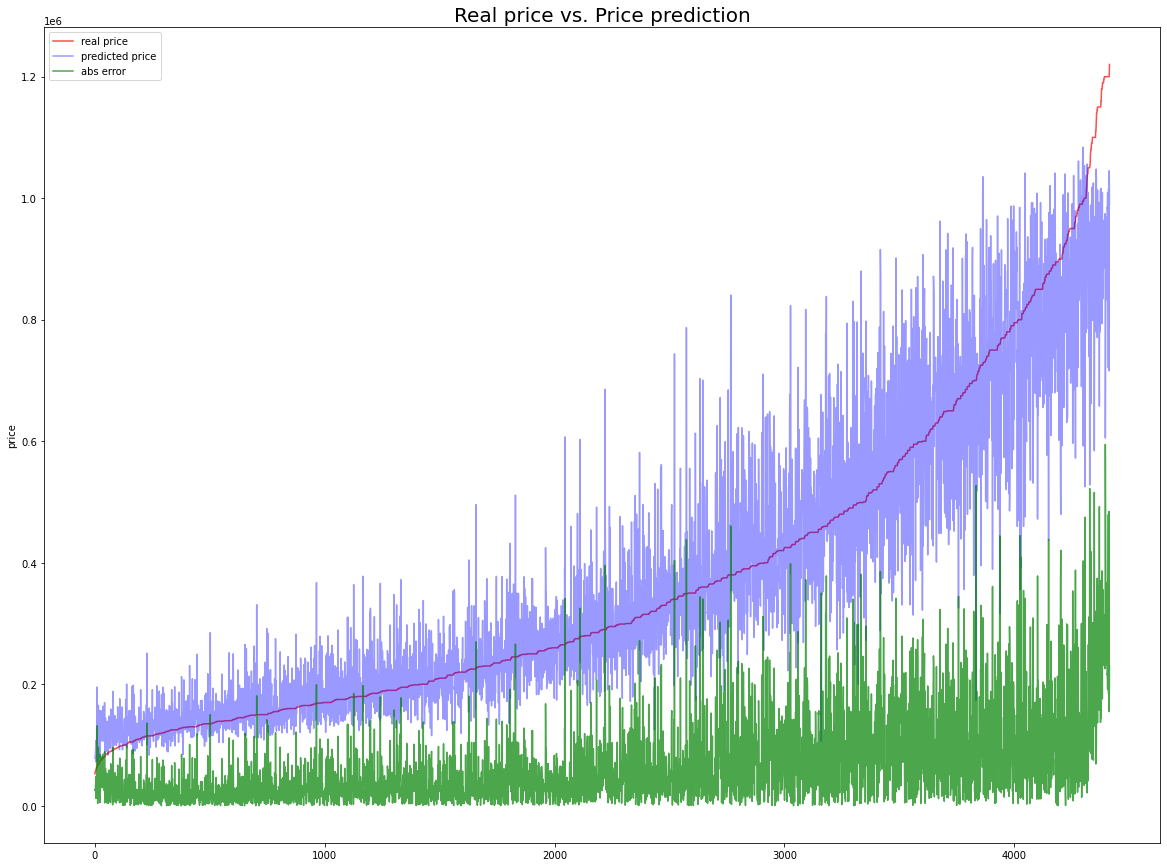

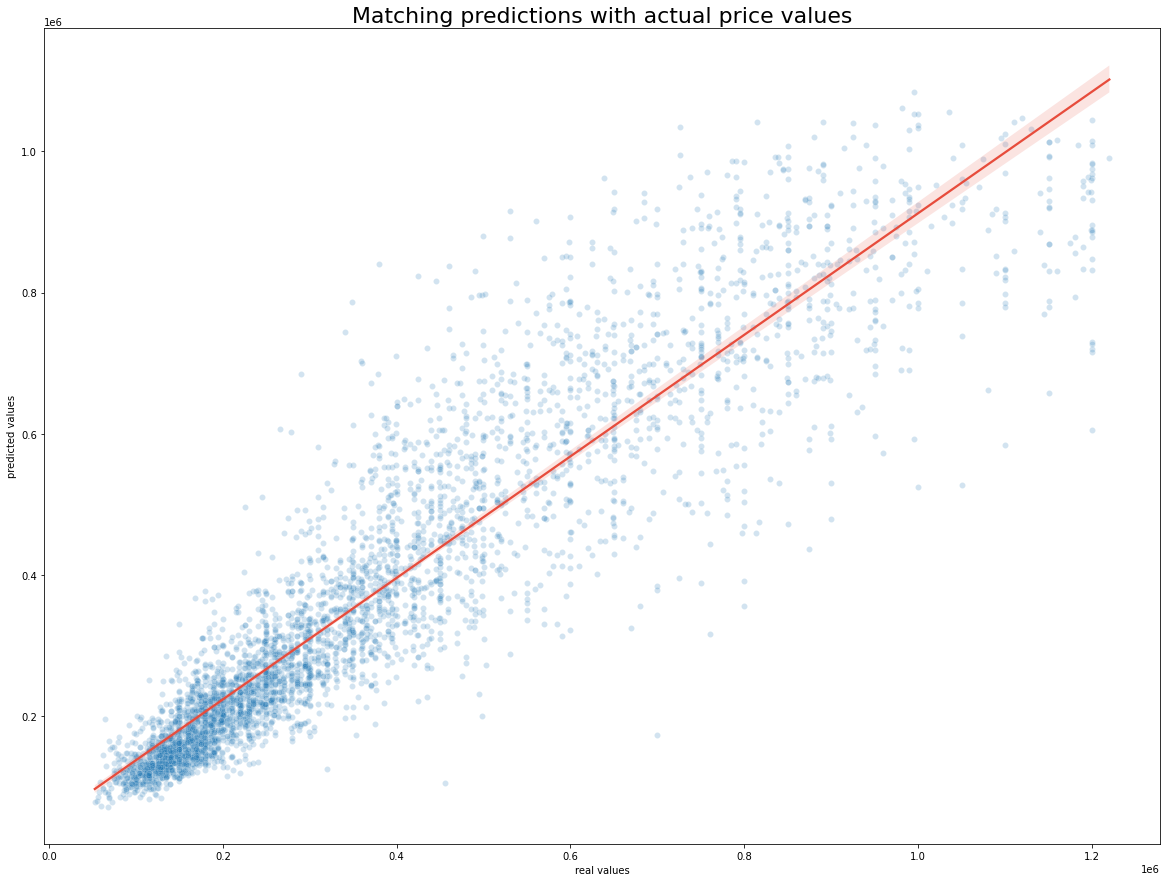

In [90]:
models = mf.test_regression_models(df_model,'Gradient Boosting Regression')

#### **XGBoost Regressor**

XGBoost Regression



model      r2           mse        rmse         mae   type
0  XGBoost Regression  0.8668  8.736963e+09  93471.7218  61869.5751  train
1  XGBoost Regression  0.8522  9.566165e+09  97806.7761  64936.7896   test

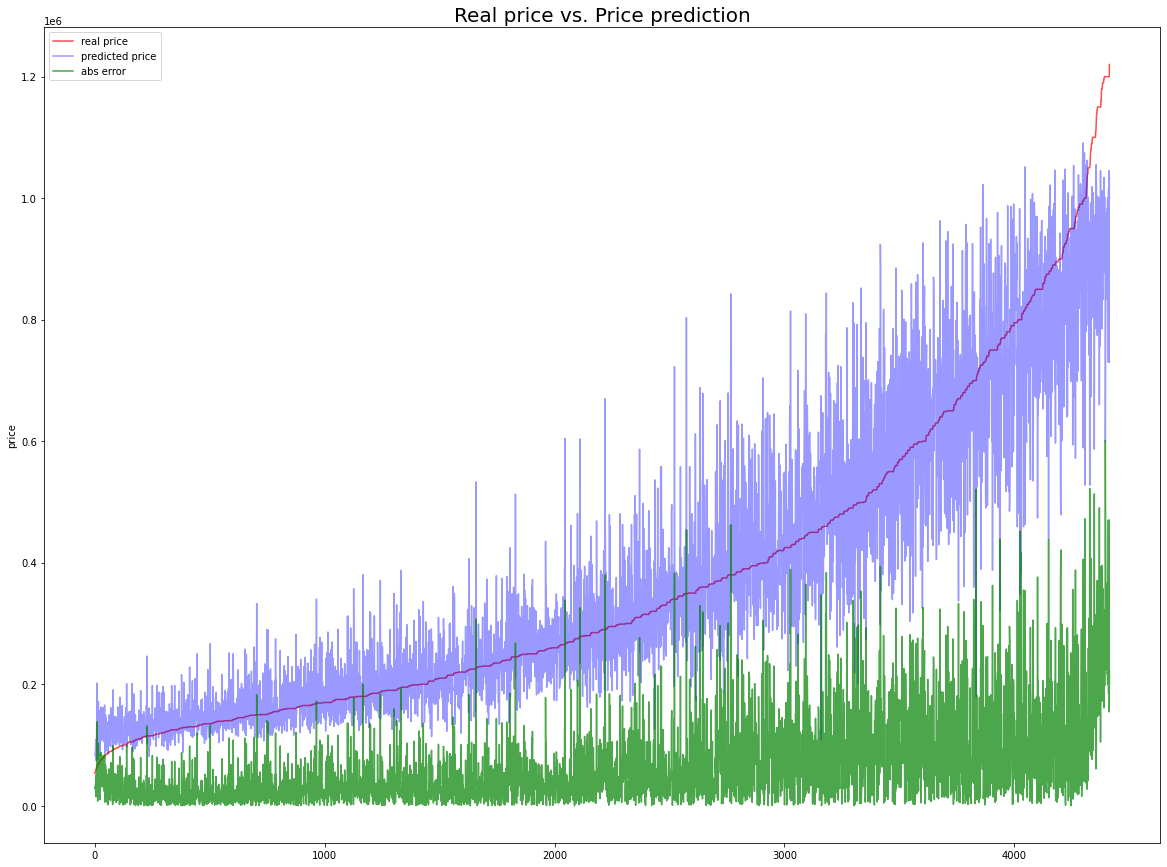

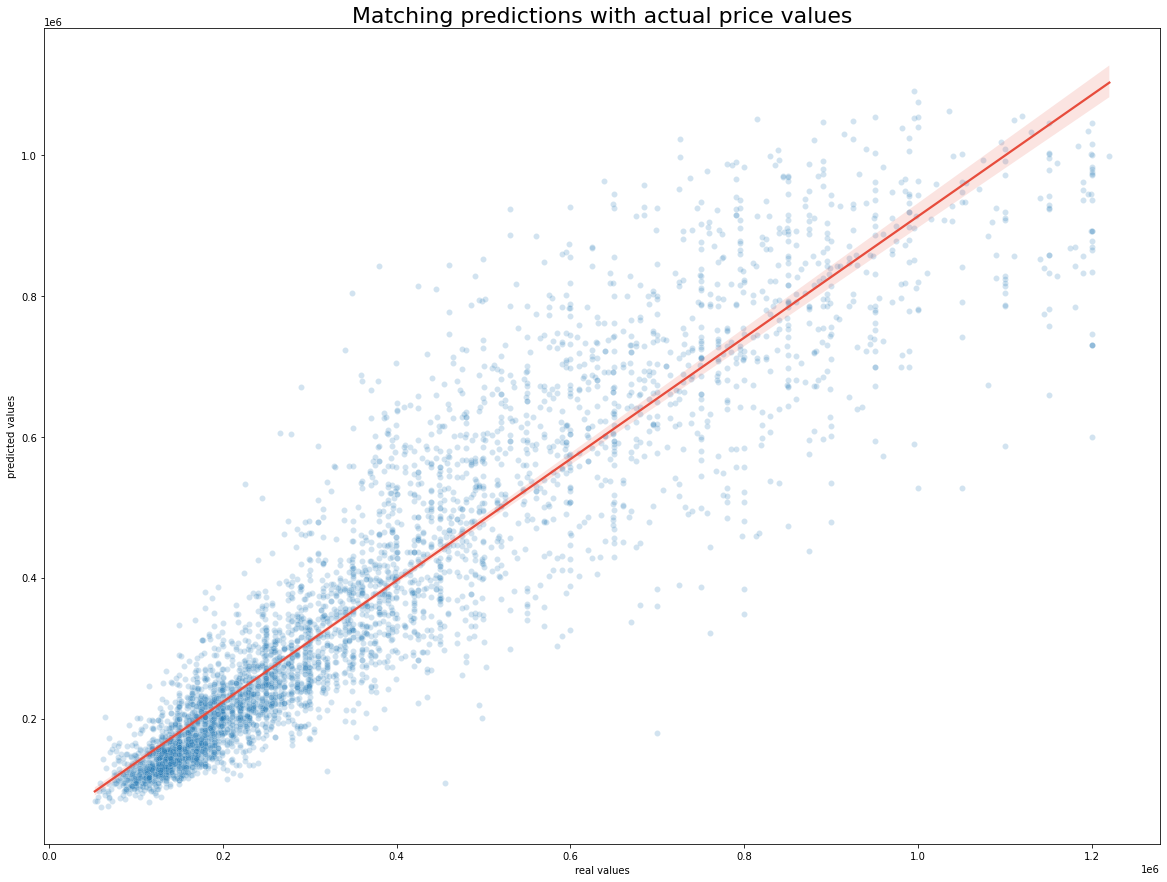

In [91]:
models = mf.test_regression_models(df_model,'XGBoost Regression')

#### **CatBoost Regressor**

CatBoost Regression



model      r2           mse        rmse         mae   type
0  CatBoost Regression  0.9084  6.005724e+09  77496.6049  51549.8699  train
1  CatBoost Regression  0.8707  8.369643e+09  91485.7534  59980.8480   test

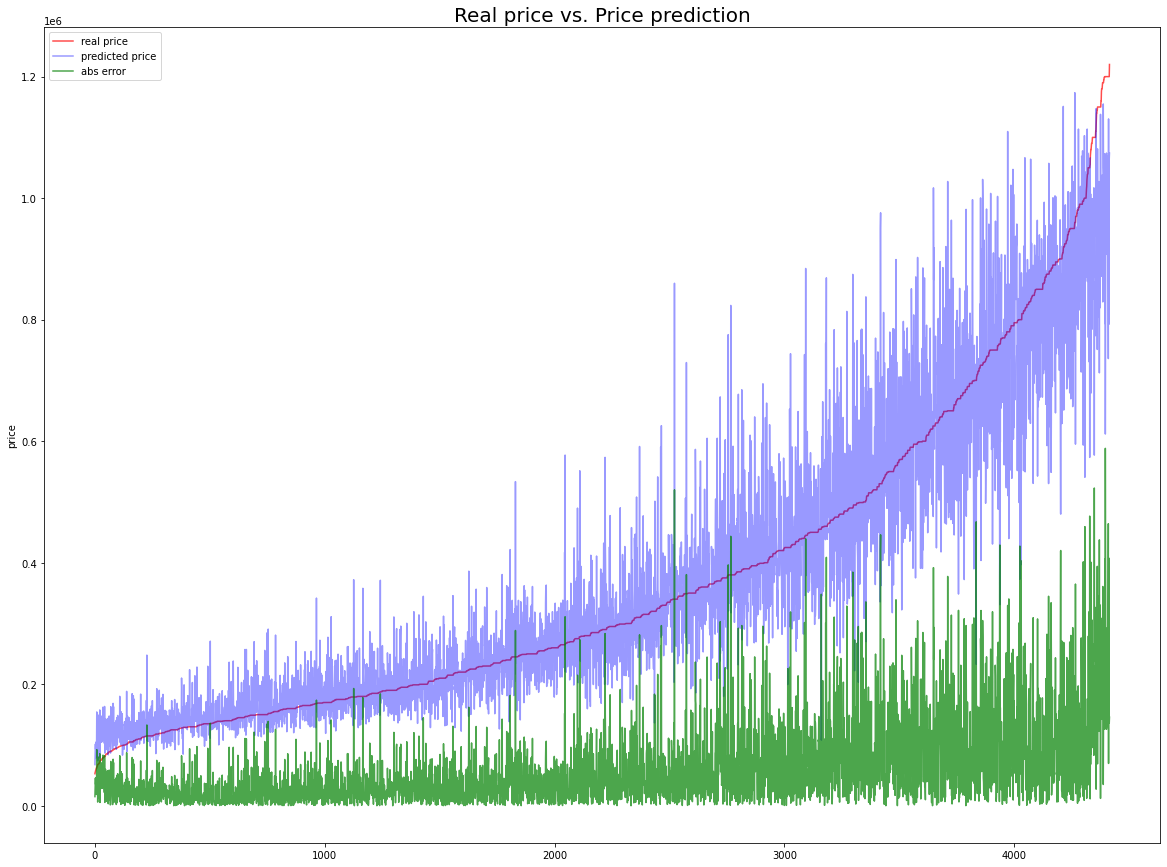

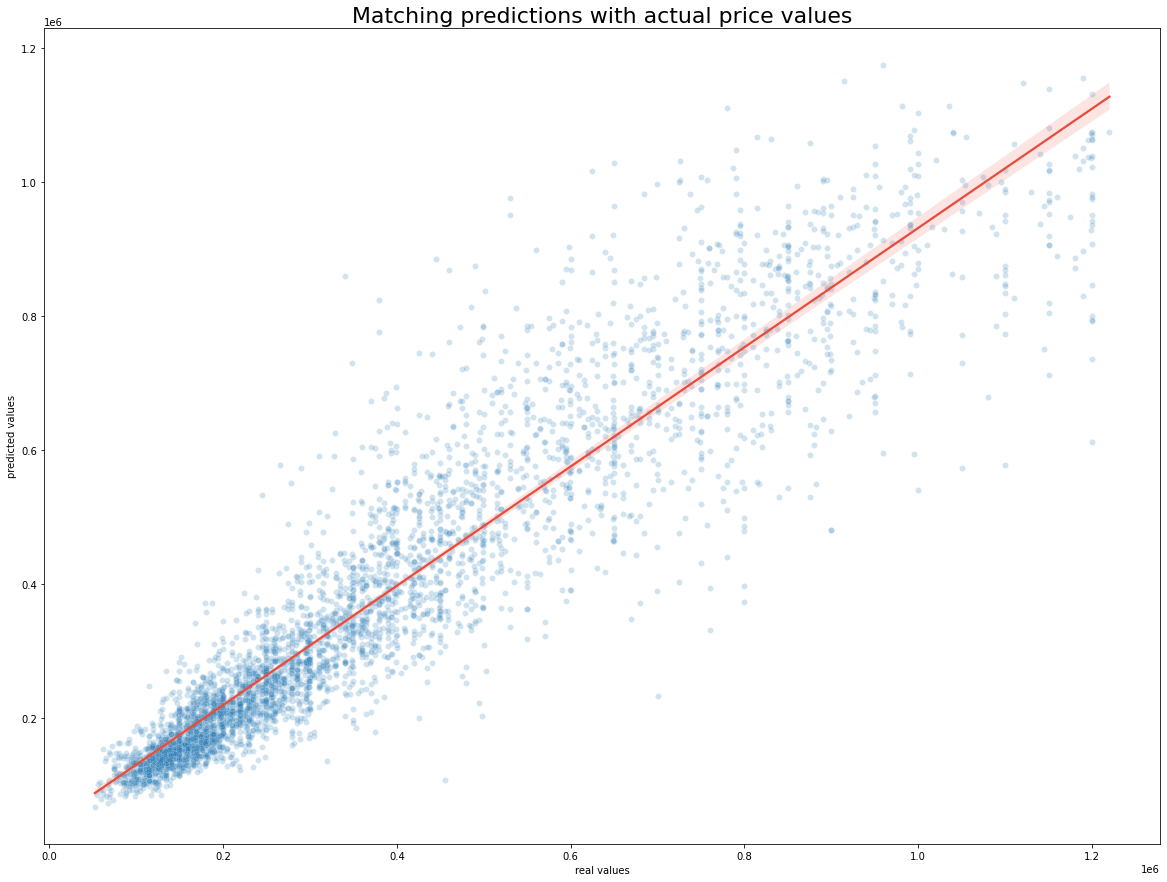

In [92]:
models = mf.test_regression_models(df_model,'CatBoost Regression')

#### **LGBM Regressor**

LightBM Regression



model      r2           mse        rmse         mae   type
0  LightBM Regression  0.8938  6.964769e+09  83455.1889  55341.9985  train
1  LightBM Regression  0.8668  8.623379e+09  92862.1523  61213.5767   test

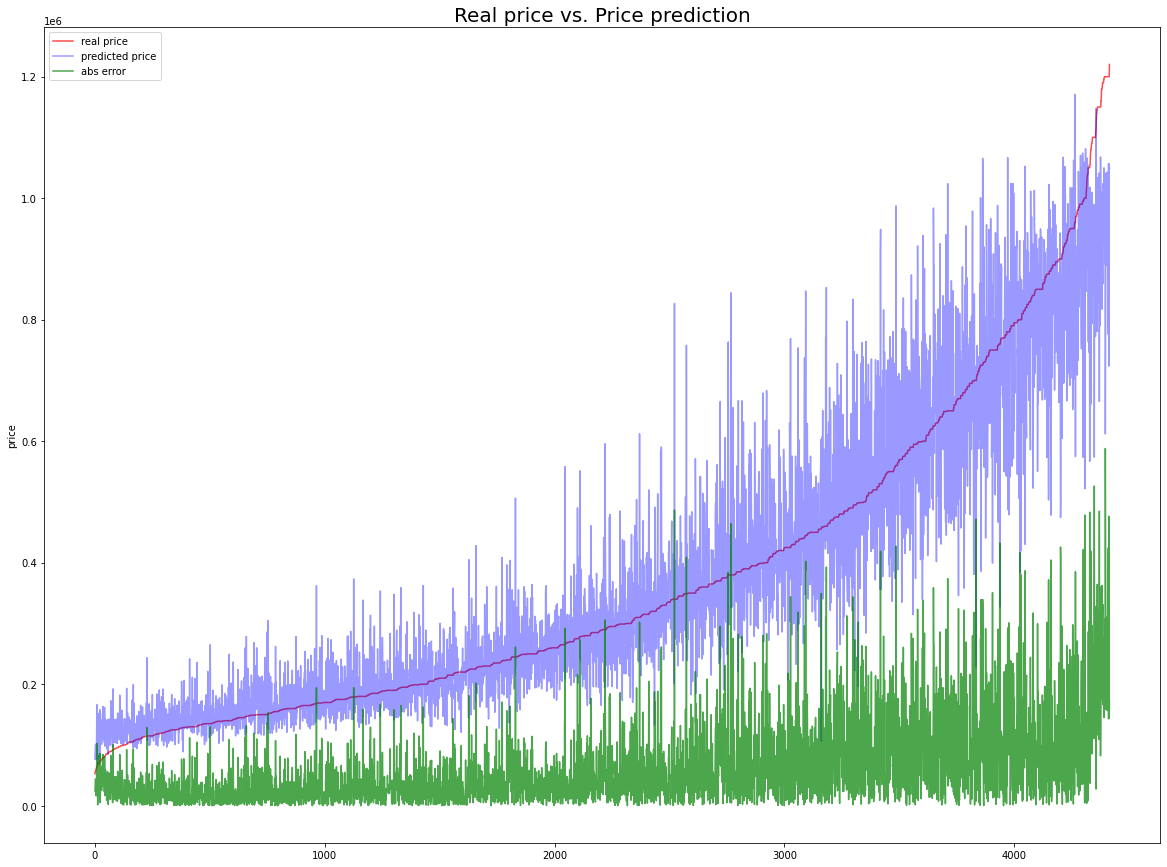

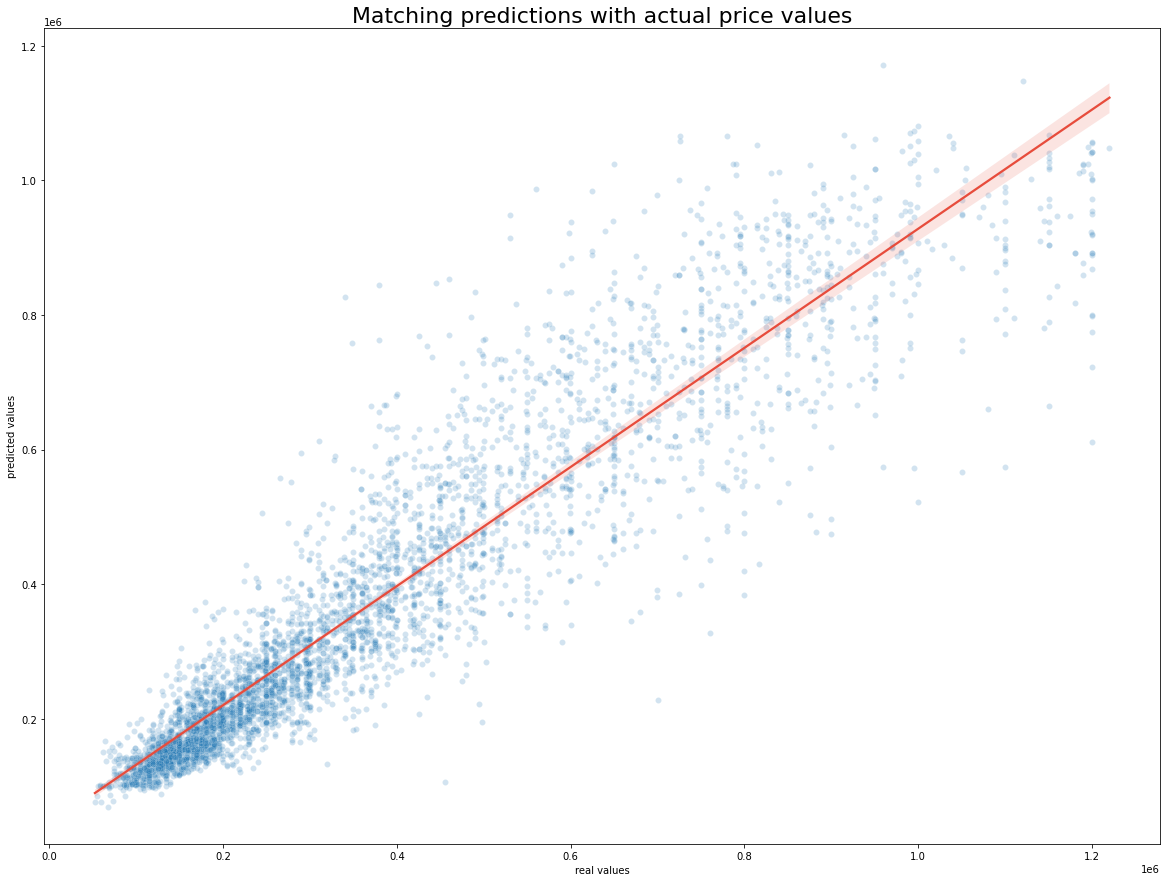

In [93]:
models = mf.test_regression_models(df_model,'LightBM Regression')

After deciding to continue with One Hot Encoding, we see that the best performing models are CatBoost and LightGBM, two boosting models. So we will work on their hyperparameters to improve their performance.

## **Clustering (new feature)**

But first, we wanted to perform a new experiment, which was to include a new feature based on clusters. For this we tested KMeans and HDBSCAN.

In [94]:
clustering_df_price = df_one_hot_encoding['price']
clustering_df = df_one_hot_encoding.drop(['price'],axis=1)

### **KMeans**

First, let's check what would be the appropriate number of clusters for KMeans.

Text(0.5, 0, 'Clusters')

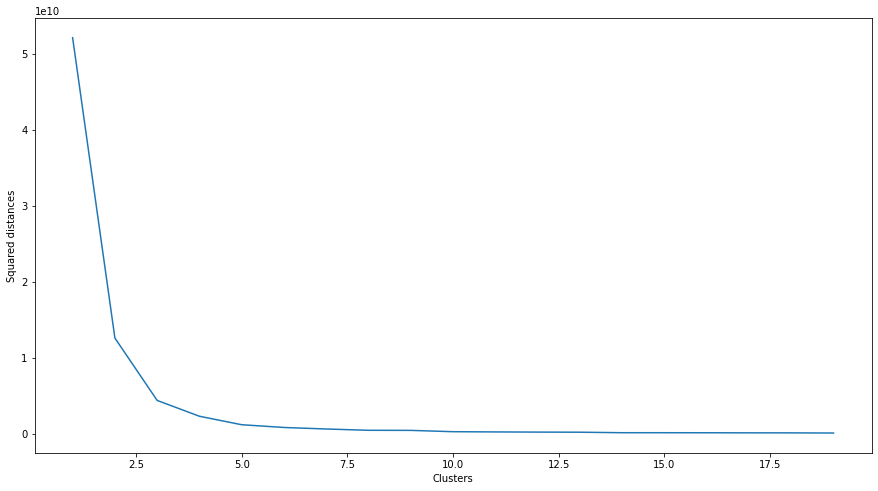

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sq_distances = []
K = range(1,20)

for clusters in K:
  kmeans = KMeans(n_clusters = clusters,init='random')
  kmeans.fit(clustering_df)
  sq_distances.append(kmeans.inertia_)

sns.lineplot(x=K, y=sq_distances)
ax.set_ylabel('Squared distances')
ax.set_xlabel('Clusters')

According to the Elbow method, it seems that the number of clusters should be 3.

CPU times: user 4min 21s, sys: 1min 5s, total: 5min 26s
Wall time: 4min 10s


Text(0.5, 0, 'Clusters')

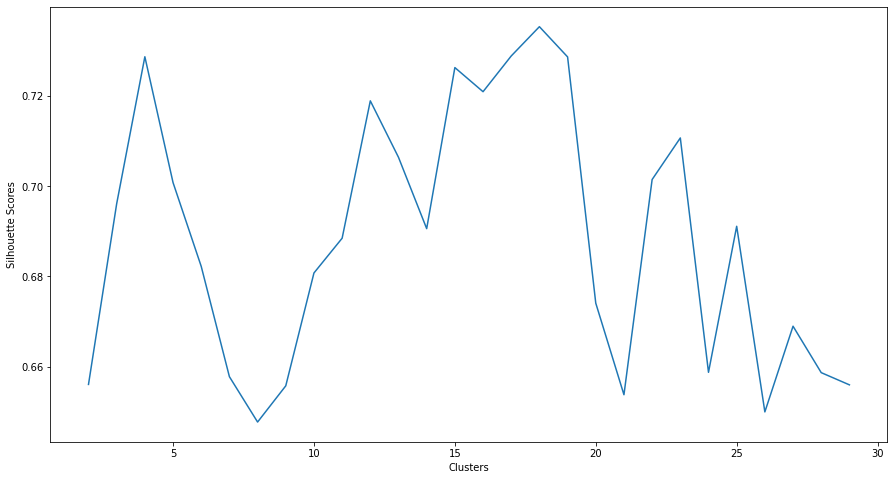

In [96]:
%%time
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(1, 1, figsize=(15,8))
silhouette_scores = []
K = range(2,30)

for clusters in K:
  kmeans = KMeans(n_clusters = clusters,init='random')
  kmeans.fit(clustering_df)
  cluster_labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(clustering_df, cluster_labels))

sns.lineplot(x=K, y=silhouette_scores)
ax.set_ylabel('Silhouette Scores')
ax.set_xlabel('Clusters')

According to the silhouette method, the number of clusters should be 17.

In [97]:
kmeans = KMeans(n_clusters=17)
clustering = kmeans.fit_predict(clustering_df)

In [98]:
df_ohe_kmeans = df_one_hot_encoding.copy()
df_ohe_kmeans['cluster'] = clustering

Text(0.5, 0.98, 'Price vs Size')

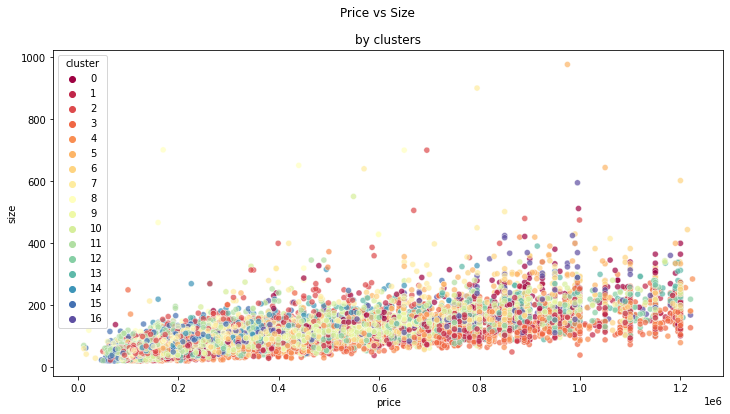

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.scatterplot(data=df_ohe_kmeans,x='price',y='size',hue='cluster',legend="full",alpha=0.7,ax=ax,palette="Spectral")
ax.set_title('by clusters')
fig.suptitle('Price vs Size')

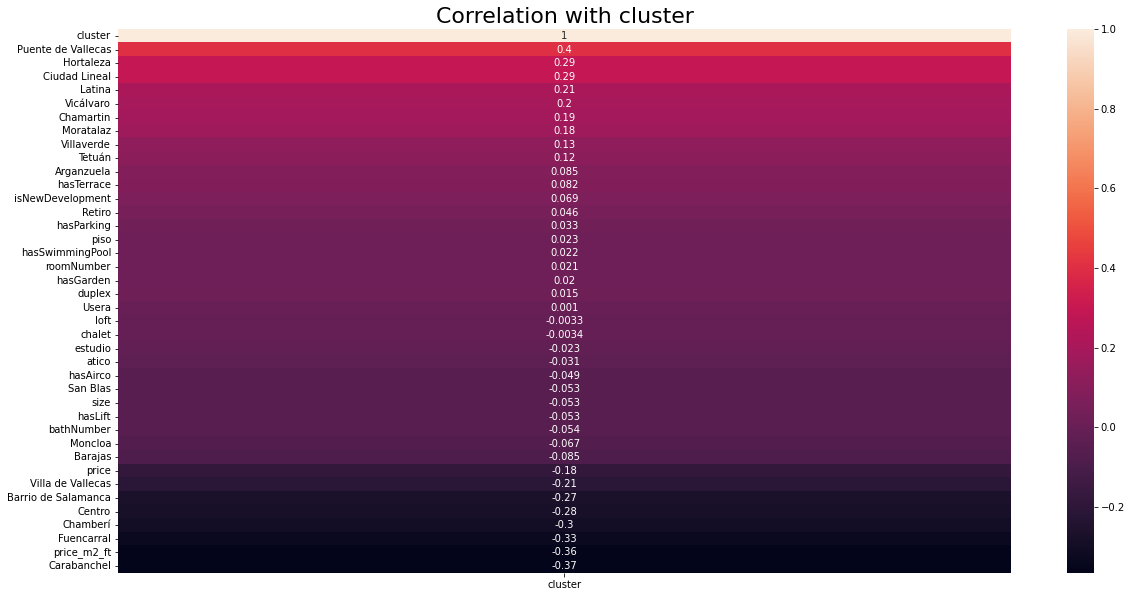

In [100]:
vf.plot_feature_correlation_matrix(df_ohe_kmeans,'cluster')

### **HDBSCAN**

In order to apply HDBSCAN, we first reduce to 2 dimensions with TSNE.

In [101]:
tsne_data = TSNE(n_components=2).fit_transform(clustering_df)
df_tsne = pd.DataFrame(tsne_data) 
df_tsne.columns = ['x1','x2']
df_tsne

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


x1         x2
0      28.172428 -54.183582
1     -84.945641 -32.455967
2      -1.144027 -60.834038
3      62.200180 -34.981297
4     -17.552261  85.221565
...          ...        ...
22073 -31.795830  45.255989
22074 -35.190617  45.150433
22075 -91.830887  -1.830541
22076 -18.610415 -24.247885
22077 -27.789097  16.948963

[22078 rows x 2 columns]

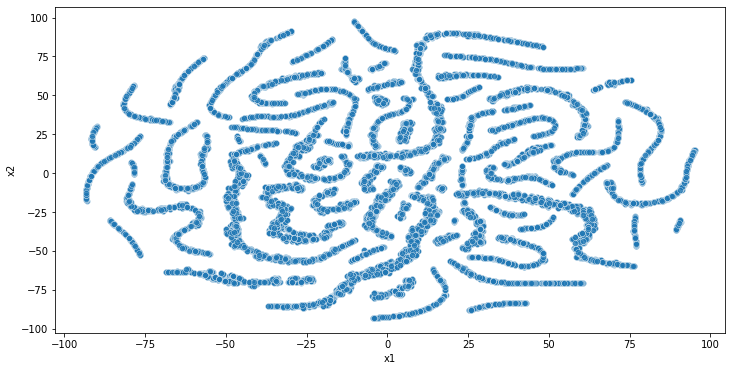

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.scatterplot(data=df_tsne,x='x1',y='x2',legend="full",alpha=0.7,ax=ax)

In [103]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100,min_samples=4, gen_min_span_tree=True)

clusterer.fit(df_tsne)
hdb_labels = clusterer.labels_
df_tsne['cluster'] = hdb_labels

print(f'Estimated number of clusters: {df_tsne["cluster"].nunique()}')

Estimated number of clusters: 85


In [104]:
df_ohe_hdbscan = df_one_hot_encoding.copy()
df_ohe_hdbscan['cluster'] = hdb_labels

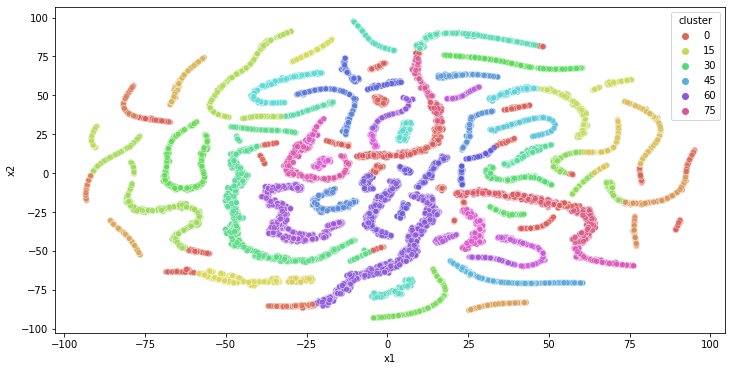

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.scatterplot(data=df_tsne,x='x1',y='x2',hue='cluster',legend="brief",alpha=0.7,ax=ax,palette="hls")

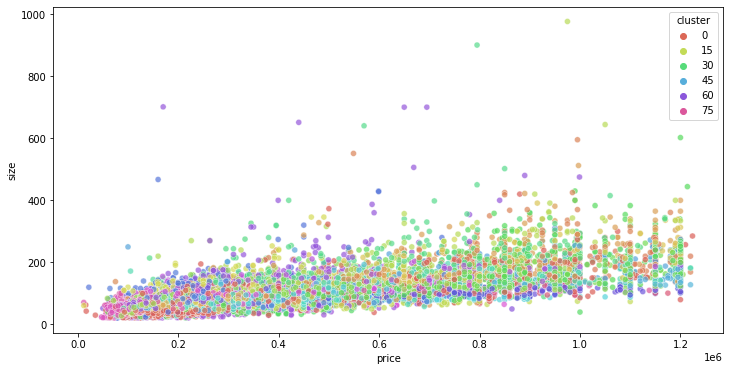

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.scatterplot(data=df_ohe_hdbscan,x='price',y='size',hue='cluster',legend="brief",alpha=0.7,ax=ax,palette="hls")

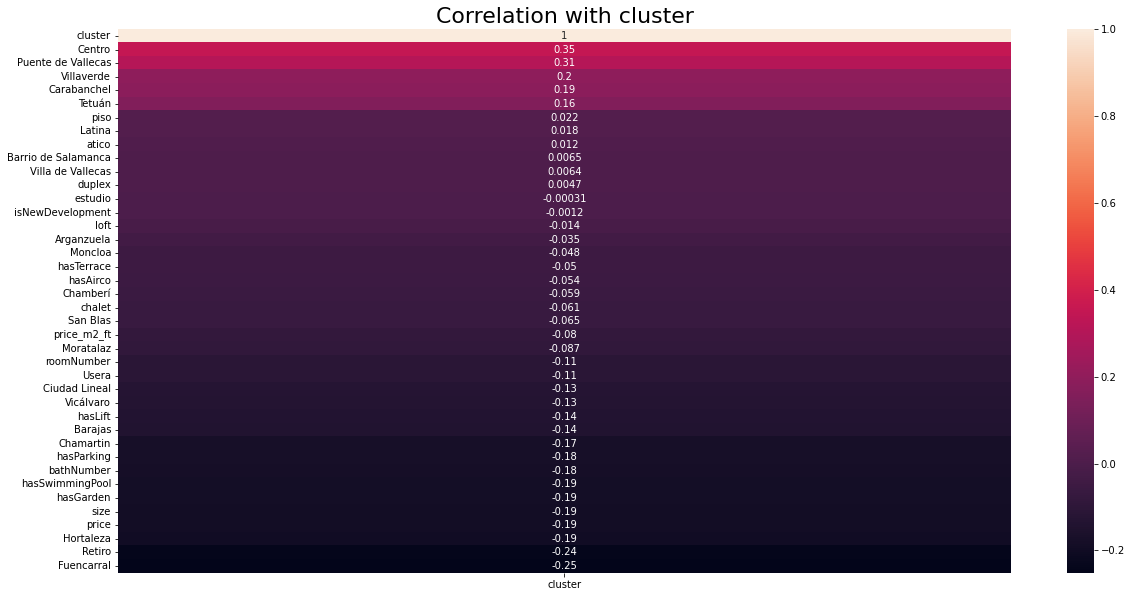

In [107]:
vf.plot_feature_correlation_matrix(df_ohe_hdbscan,'cluster')

### **Testing clustering as feature**

As can be seen below, when comparing the performance of CatBoost without the clustering feature with those with it, KMeans have slightly better performance in the R2 and RMSE values. Therefore, we decided to continue with the cluster created by KMeans.

CatBoost Regression



model      r2           mse        rmse         mae   type
0  CatBoost Regression  0.9084  6.005724e+09  77496.6049  51549.8699  train
1  CatBoost Regression  0.8707  8.369643e+09  91485.7534  59980.8480   test

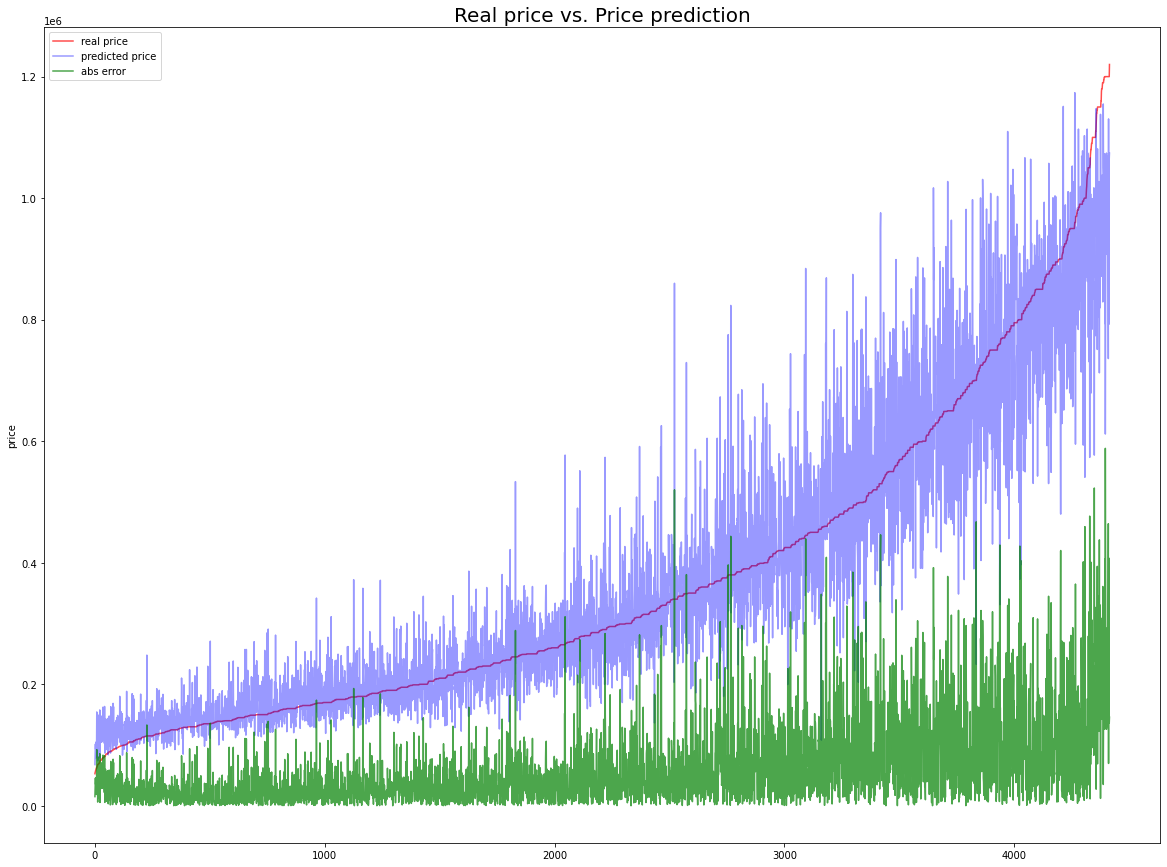

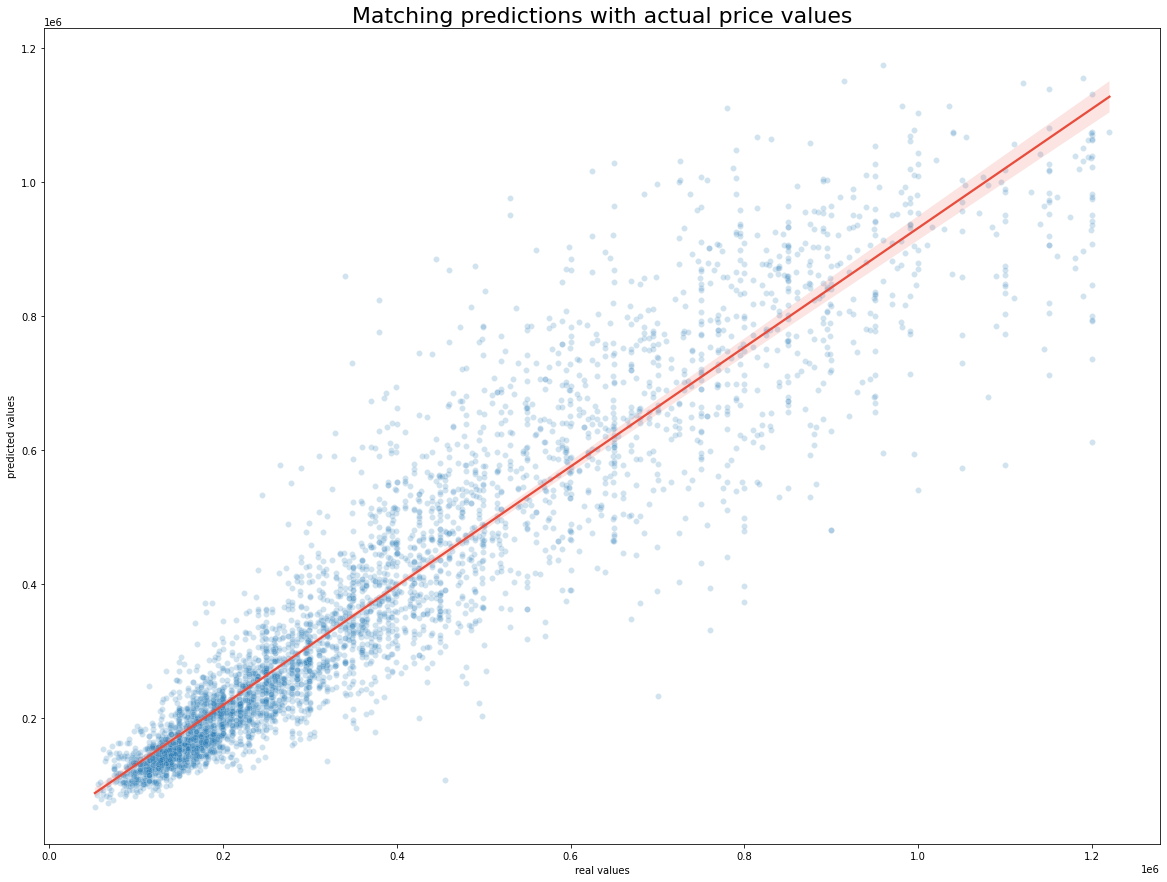

In [108]:
models = mf.test_regression_models(df_one_hot_encoding,'CatBoost Regression')

CatBoost Regression



model      r2           mse        rmse         mae   type
0  CatBoost Regression  0.9086  5.994176e+09  77422.0662  51439.0468  train
1  CatBoost Regression  0.8720  8.285730e+09  91025.9829  59756.0979   test

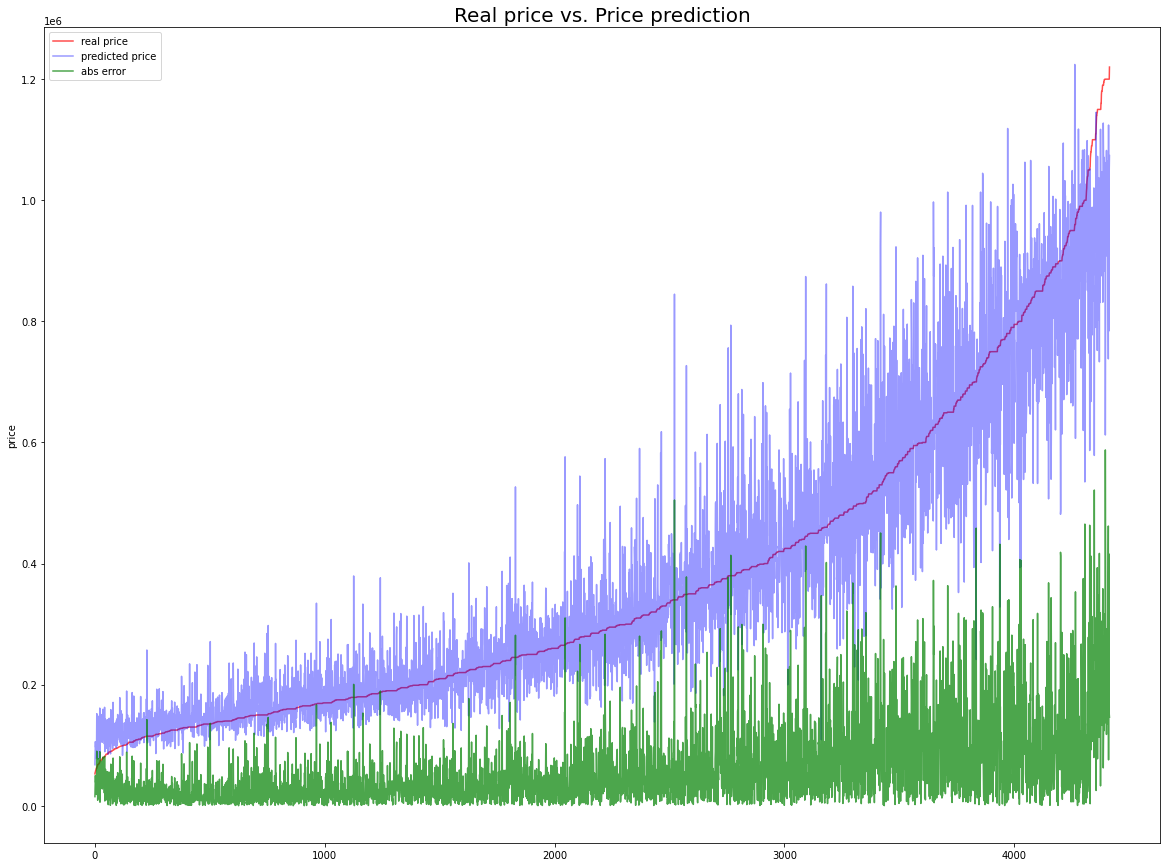

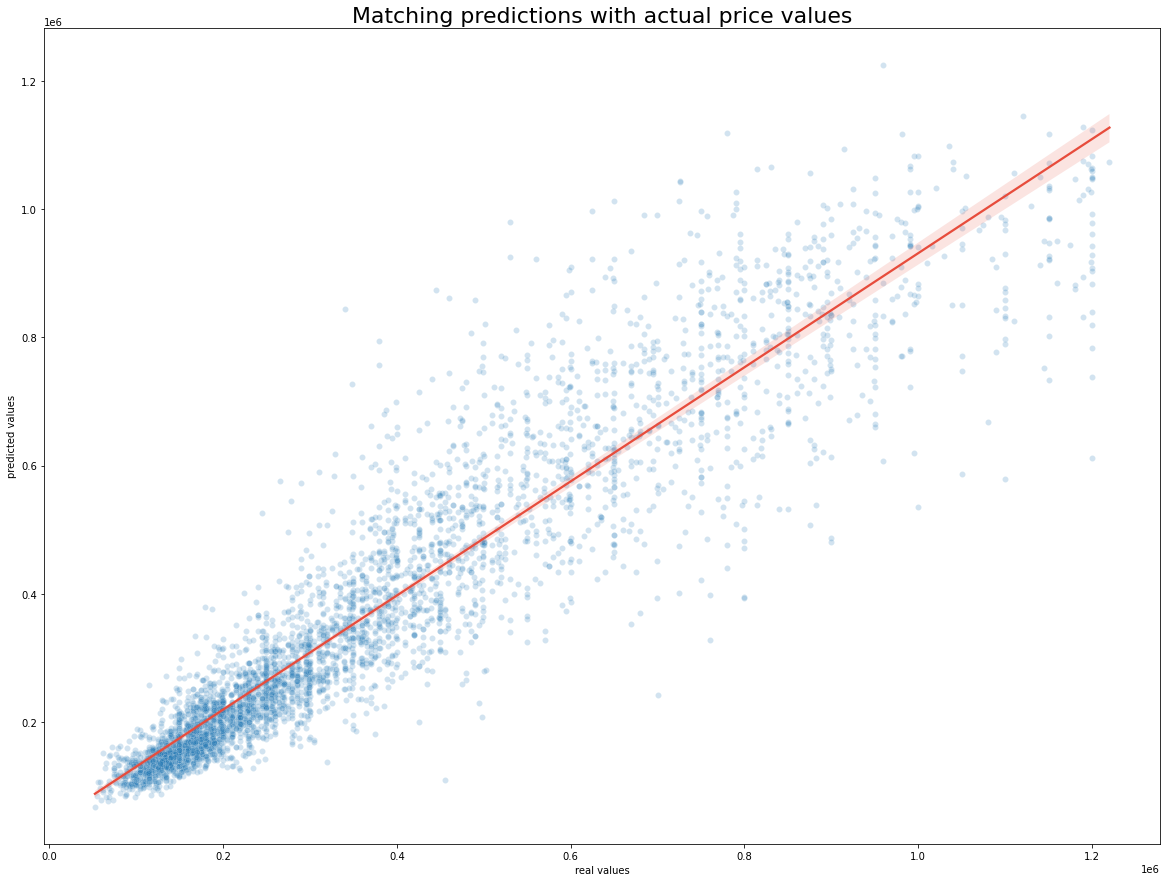

In [109]:
models = mf.test_regression_models(df_ohe_kmeans,'CatBoost Regression')

CatBoost Regression



model      r2           mse        rmse         mae   type
0  CatBoost Regression  0.9099  5.906365e+09  76852.8809  51126.9386  train
1  CatBoost Regression  0.8704  8.389845e+09  91596.0998  60081.6251   test

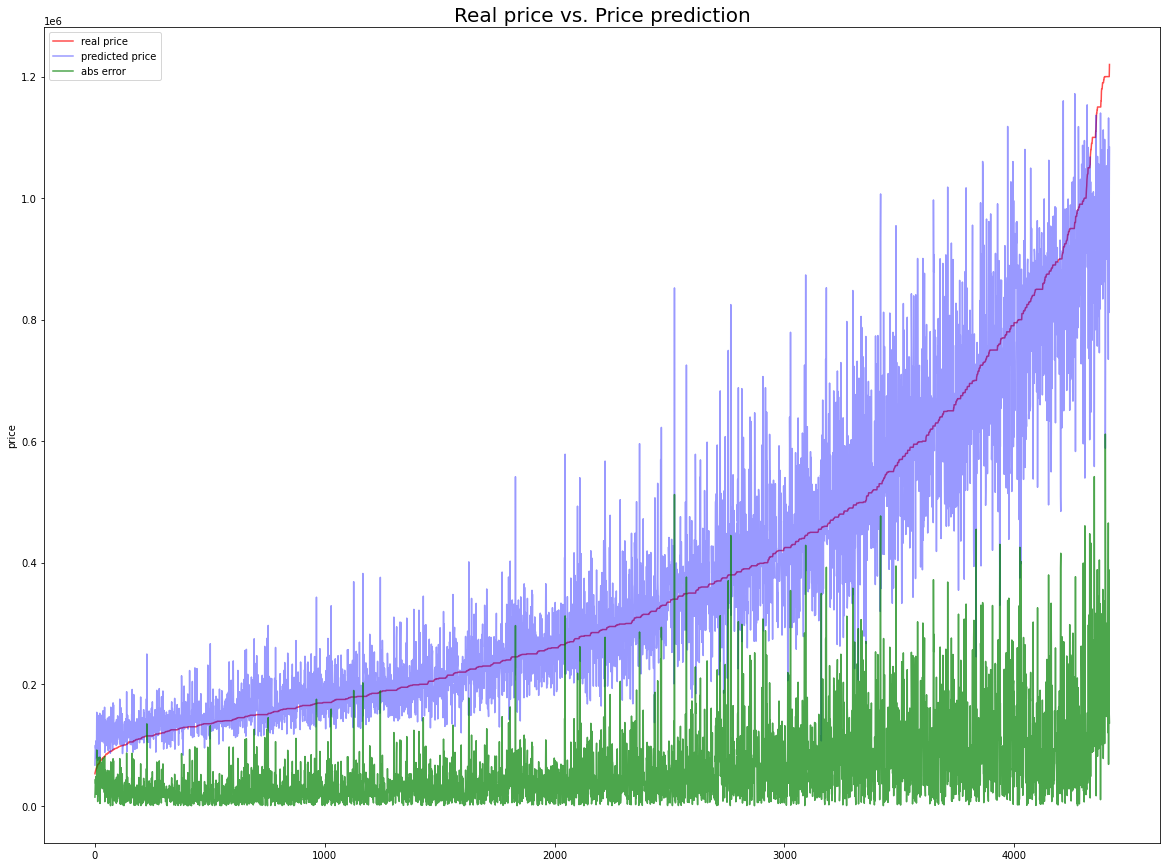

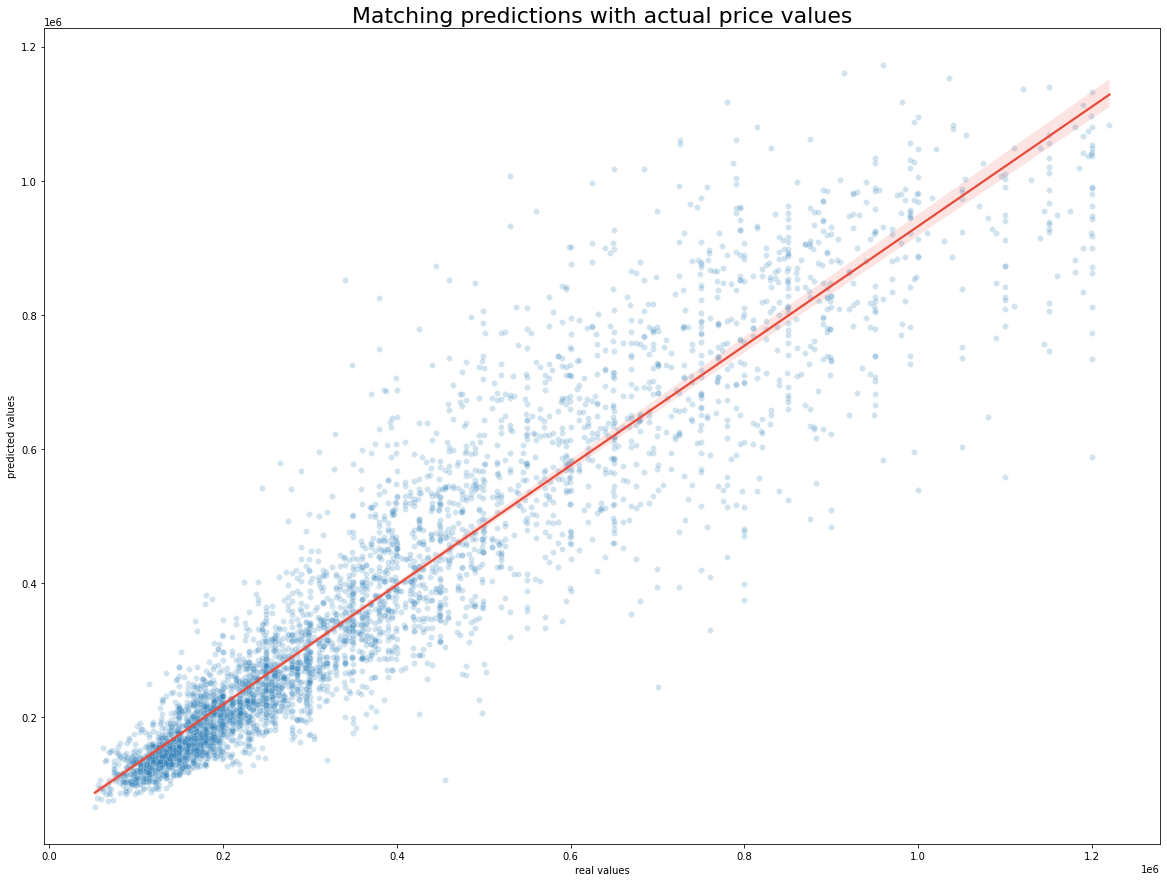

In [110]:
models = mf.test_regression_models(df_ohe_hdbscan,'CatBoost Regression')

# **Saving datasets**

In [ ]:
datasets_folder = '/content/drive/MyDrive/Kschool_TFM/datasets'
df_ohe_kmeans.to_csv(f'{datasets_folder}{os.sep}dataset-05-modeling_one_hot_encoding.csv',index=False)

In [ ]:
mf.pickle_dump('kmeans','kmeans')

kmeans saved as pickle file.
